In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Data/allcomp_output.csv')    # importing matrix of all the composition based features.

In [3]:
df1

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,6.67,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,0.00,8.33,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,0.00,14.29,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,13.04,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,13.04,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,0.00,15.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
16671,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895
16672,20.00,0.00,0.00,0.00,5.00,10.00,0.00,5.00,0.00,20.00,...,0.0000,0.0000,0.0001,0.0000,0.0001,0.0001,0.2857,0.2857,0.2105,9402.0526
16673,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,0.00,13.33,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3449,0.3449,0.3761,9801.2143


In [4]:
df2 = pd.read_csv('Data/peptide_aa_comp_df.csv', usecols=['Sequence','Qualitative_Measure']) 

In [5]:
df2['Sequence'] = df2.Sequence.str.strip()

In [6]:
df2

,Sequence,Qualitative_Measure
0,DRAHYNIVTFCCKCD,Positive
1,MHGDTPTLHEYM,Positive
2,DSTLRLCVQSTHVD,Positive
3,RNGYRALMDKSLHVGTQCALTRR,Positive
4,RNGYRALMDKSLHVGTQCALTRR,Positive
...,...,...
16776,SCSPTFSSDPLTTPPLMLTT,Negative
16777,PLPWALQTTNLPLMAMSSLL,Positive
16778,ILLLATMATAFMGYALPWGQ,Negative
16779,SHMEPSFGLILHDGG,Positive


## Filter peptides lying outside the range of 8-25

In [7]:
filter1 = df2.Sequence.map(len) >= 8

In [8]:
filter2 = df2.Sequence.map(len) <= 25

In [9]:
df3 = df2.loc[filter1 & filter2]

In [10]:
df3

,Sequence,Qualitative_Measure
0,DRAHYNIVTFCCKCD,Positive
1,MHGDTPTLHEYM,Positive
2,DSTLRLCVQSTHVD,Positive
3,RNGYRALMDKSLHVGTQCALTRR,Positive
4,RNGYRALMDKSLHVGTQCALTRR,Positive
...,...,...
16776,SCSPTFSSDPLTTPPLMLTT,Negative
16777,PLPWALQTTNLPLMAMSSLL,Positive
16778,ILLLATMATAFMGYALPWGQ,Negative
16779,SHMEPSFGLILHDGG,Positive


In [11]:
df3.reset_index(drop=True, inplace=True) # need to reset index before concatenating

In [12]:
df = pd.concat([df3,df1], axis=1)

## Our final dataframe

In [13]:
df

,Sequence,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,DRAHYNIVTFCCKCD,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,MHGDTPTLHEYM,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,DSTLRLCVQSTHVD,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,SCSPTFSSDPLTTPPLMLTT,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
16671,PLPWALQTTNLPLMAMSSLL,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895
16672,ILLLATMATAFMGYALPWGQ,Negative,20.00,0.00,0.00,0.00,5.00,10.00,0.00,5.00,...,0.0000,0.0000,0.0001,0.0000,0.0001,0.0001,0.2857,0.2857,0.2105,9402.0526
16673,SHMEPSFGLILHDGG,Positive,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3449,0.3449,0.3761,9801.2143


In [61]:
#saving the dataframe
# df.to_csv('Data/final_df.csv', index=False)

## Generating Negative and Positive Fasta sequence files

In [14]:
negatives = df.loc[df['Qualitative_Measure'] == 'Negative', 'Sequence']

In [15]:
positives = df.loc[df['Qualitative_Measure'] == 'Positive', 'Sequence']

In [71]:
# saving the negative sequences into fasta file format for future use
# with open('negatives.fasta','w') as file:
#     num = 1
#     for i in negatives:
#         line = f">{num}\n{i}"
#         num += 1
#         file.writelines(line + "\n")

In [72]:
# saving the positive sequences into fasta file format for future use
# with open('positives.fasta','w') as file:
#     num = 1
#     for i in positives:
#         line = f">{num}\n{i}"
#         num+=1
#         file.writelines(line + '\n')

## 1. Peptide length distribution

In [16]:
from collections import Counter

### 1.1 For il-5 non inducing peptides

In [17]:
ln = [len(i) for i in negatives]

In [18]:
pld_n = Counter(ln)
pld_n

Counter({15: 11861,
         16: 562,
         20: 128,
         17: 102,
         19: 37,
         12: 40,
         10: 74,
         14: 115,
         18: 25,
         13: 176,
         24: 15,
         22: 15,
         9: 38,
         11: 32,
         25: 1,
         21: 3,
         23: 6})

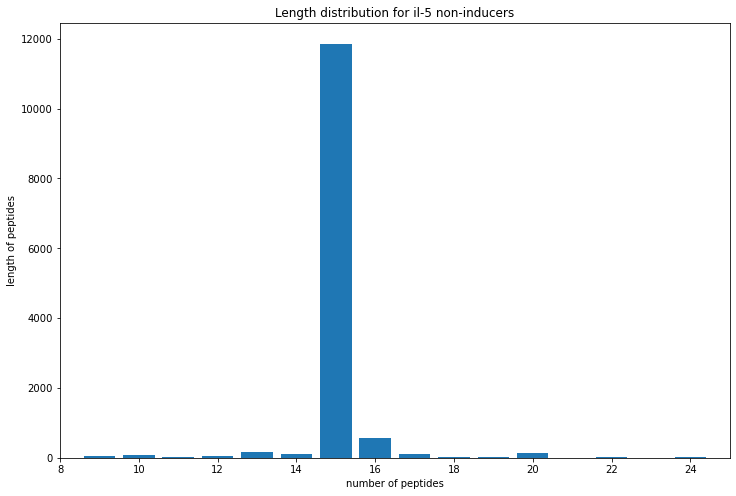

In [23]:
# peptide length distribution for il-5 non inducing peptides
plt.figure(figsize=(12,8))
plt.bar(pld_n.keys(), pld_n.values())
plt.xlim(8,25)
plt.title('Length distribution for il-5 non-inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

### 1.2 For il-5 inducing peptides

In [24]:
lp = [len(i) for i in positives]

pld_p = Counter(lp)
pld_p

Counter({15: 2449,
         12: 20,
         14: 54,
         23: 5,
         20: 152,
         11: 13,
         17: 58,
         16: 467,
         9: 17,
         8: 5,
         18: 34,
         21: 10,
         19: 24,
         13: 75,
         10: 27,
         25: 8,
         24: 13,
         22: 14})

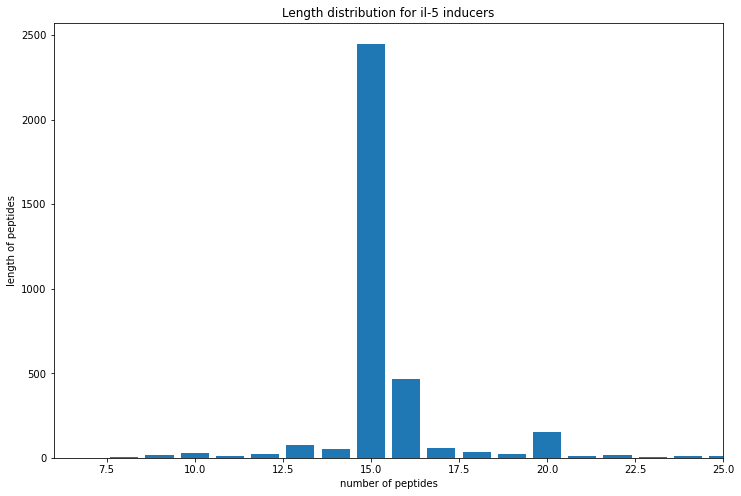

In [25]:
# peptide length distribution for il-5 inducing peptides
plt.figure(figsize=(12,8))
plt.bar(pld_p.keys(), pld_p.values())
plt.xlim(6,25)
plt.title('Length distribution for il-5 inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

### 1.3 For both of them together

In [26]:
# adding peptide length and number column in the df3 dataframe for plotting
df3['peptide_length'] = df3.Sequence.map(len)
df3['number'] = 1

In [27]:
df3

,Sequence,Qualitative_Measure,peptide_length,number
0,DRAHYNIVTFCCKCD,Positive,15,1
1,MHGDTPTLHEYM,Positive,12,1
2,DSTLRLCVQSTHVD,Positive,14,1
3,RNGYRALMDKSLHVGTQCALTRR,Positive,23,1
4,RNGYRALMDKSLHVGTQCALTRR,Positive,23,1
...,...,...,...,...
16670,SCSPTFSSDPLTTPPLMLTT,Negative,20,1
16671,PLPWALQTTNLPLMAMSSLL,Positive,20,1
16672,ILLLATMATAFMGYALPWGQ,Negative,20,1
16673,SHMEPSFGLILHDGG,Positive,15,1


In [28]:
df3.groupby(['Qualitative_Measure','peptide_length']).number.sum()

Qualitative_Measure  peptide_length
Negative             9                    38
                     10                   74
                     11                   32
                     12                   40
                     13                  176
                     14                  115
                     15                11861
                     16                  562
                     17                  102
                     18                   25
                     19                   37
                     20                  128
                     21                    3
                     22                   15
                     23                    6
                     24                   15
                     25                    1
Positive             8                     5
                     9                    17
                     10                   27
                     11                   13
                   

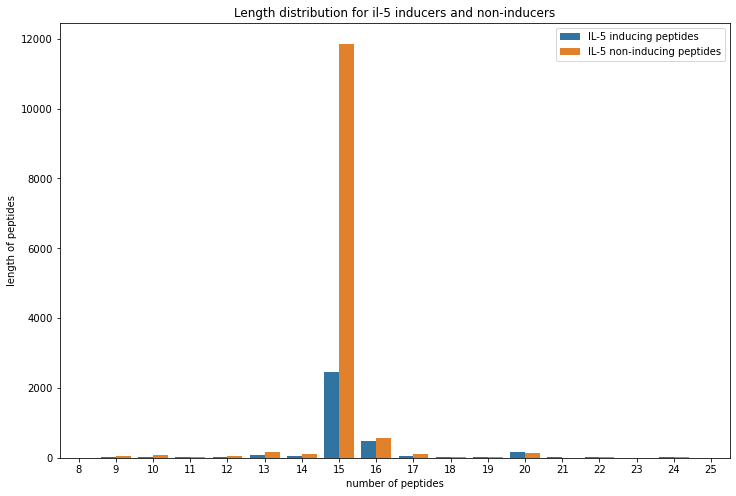

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(df3.peptide_length, hue=df3.Qualitative_Measure)
plt.legend(['IL-5 inducing peptides', 'IL-5 non-inducing peptides'])
plt.title('Length distribution for il-5 inducers and non-inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

So, for both il-5 inducing and il-5 non-inducing peptides we see that the peptides lie in the range of 9-25 aa in length, with majority having a length of 15 aa,however, for the il-5 non-inducing peptides, the disparity between 15 and 16 peptide length (15 aa peptides are 21x more frequent than 16 aa peptides) is larger as compared to il-5 inducing peptides(15 aa peptides are 5x more as compared to 16 aa peptides).

In [74]:
print(2449/454)
print(11861/544)

5.394273127753304
21.803308823529413


## 2. Amino acid composition analysis

In [31]:
# slicing chunk of df with only the amino acid composition columns
aac_df = df.loc[:,'Qualitative_Measure':'AAC_Y']

In [32]:
aac_df

,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,6.67,...,0.00,6.67,0.00,0.00,6.67,0.00,6.67,6.67,0.0,6.67
1,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,0.00,...,16.67,0.00,8.33,0.00,0.00,0.00,16.67,0.00,0.0,8.33
2,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,0.00,...,0.00,0.00,0.00,7.14,7.14,14.29,14.29,14.29,0.0,0.00
3,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,...,4.35,4.35,0.00,4.35,17.39,4.35,8.70,4.35,0.0,4.35
4,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,...,4.35,4.35,0.00,4.35,17.39,4.35,8.70,4.35,0.0,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,0.00,...,5.00,0.00,20.00,0.00,0.00,20.00,25.00,0.00,0.0,0.00
16671,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,5.00,15.00,5.00,0.00,10.00,10.00,0.00,5.0,0.00
16672,Negative,20.00,0.00,0.00,0.00,5.00,10.00,0.00,5.00,0.00,...,10.00,0.00,5.00,5.00,0.00,0.00,10.00,0.00,5.0,5.00
16673,Positive,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,0.00,...,6.67,0.00,6.67,0.00,0.00,13.33,0.00,0.00,0.0,0.00


In [33]:
aac_df.sum(axis=1)

0        100.03
1         99.99
2        100.01
3        100.03
4        100.03
          ...  
16670    100.00
16671    100.00
16672    100.00
16673    100.01
16674    100.02
Length: 16675, dtype: float64

In [34]:
# renaming the columns
aac_df.columns = ['Qualitative_Measure', 'A', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [35]:
# making separate dataframes for aa composition of negative and positive peptides
aac_n = aac_df[aac_df.Qualitative_Measure == 'Negative'].drop(columns='Qualitative_Measure')
aac_p = aac_df[aac_df.Qualitative_Measure == 'Positive'].drop(columns='Qualitative_Measure')

In [36]:
aac_neg = aac_n.sum()/len(aac_n)  # taking a mean to get the average composition of each amino acid in the neg ds
aac_neg = aac_neg.round(2)
aac_neg  # average composition of each amino acid out of 100%

A    8.79
C    1.17
D    4.95
E    5.55
F    4.64
G    6.70
H    2.10
I    6.22
K    6.38
L    9.50
M    2.22
N    4.31
P    5.23
Q    3.76
R    4.02
S    6.50
T    5.59
V    7.47
W    1.01
Y    3.90
dtype: float64

In [37]:
aac_neg.sum() # as expected the total is approx. 100%

100.01

In [38]:
aac_pos = aac_p.sum()/len(aac_p)  # taking a mean to get the average composition of each amino acid in the pos ds
aac_pos = aac_pos.round(2)
aac_pos

A    8.10
C    1.35
D    5.01
E    5.38
F    5.21
G    6.22
H    2.39
I    6.48
K    6.61
L    9.49
M    2.24
N    5.22
P    4.30
Q    3.46
R    4.41
S    6.61
T    5.09
V    7.10
W    1.13
Y    4.20
dtype: float64

In [39]:
aac_pos.sum() # as expected the total is 100%

100.0

In [40]:
# making a dataframe for average amino acid composition in the neg and pos ds.
aa_comp = pd.DataFrame({'neg':aac_neg.values, 'pos':aac_pos.values}, index = aac_neg.keys())
aa_comp.index.name = 'amino_acid'

In [41]:
aa_comp['mean_diff'] = np.abs(aa_comp['neg'] - aa_comp['pos'])
aa_comp

,neg,pos,mean_diff
amino_acid,,,
A,8.79,8.10,0.69
C,1.17,1.35,0.18
D,4.95,5.01,0.06
E,5.55,5.38,0.17
F,4.64,5.21,0.57
G,6.70,6.22,0.48
H,2.10,2.39,0.29
I,6.22,6.48,0.26
K,6.38,6.61,0.23


In [42]:
# making a function to calculate p-value per amino acid 
# and return a dictionary with the keys as the amino acids and the pvals as the vals
def p_val(df1,df2):
    p_vals = {}
    for i in df1.columns:
        p_val = stats.ttest_ind(df1[i], df2[i])[1] # slicing for the p-value
        p_vals[i] = round(p_val,4)  # updating the aa name as the key and the corresponding p-value as the value
    return p_vals

In [88]:
stats.ttest_ind(aac_n['A'],aac_p['A'])

Ttest_indResult(statistic=3.9015784031288963, pvalue=9.594275572587813e-05)

In [49]:
np.var(aac_n['Q']), np.var(aac_p['P'])

(27.81047793944667, 32.80645913632707)

In [43]:
p_vals = p_val(aac_n,aac_p)
p_vals

{'A': 0.0001,
 'C': 0.0028,
 'D': 0.5498,
 'E': 0.1598,
 'F': 0.0,
 'G': 0.0016,
 'H': 0.0001,
 'I': 0.0349,
 'K': 0.058,
 'L': 0.9643,
 'M': 0.8299,
 'N': 0.0,
 'P': 0.0,
 'Q': 0.0026,
 'R': 0.0003,
 'S': 0.3932,
 'T': 0.0,
 'V': 0.0044,
 'W': 0.0195,
 'Y': 0.0042}

In [44]:
# update the aa_comp dataframe with the column for the p-value
aa_comp['p-val'] = p_vals.values()

In [45]:
# sorting the dataframe for mean_diff in increasing order
aa_comp = aa_comp.sort_values(by='mean_diff', ascending=True)
aa_comp

,neg,pos,mean_diff,p-val
amino_acid,,,,
L,9.50,9.49,0.01,0.9643
M,2.22,2.24,0.02,0.8299
D,4.95,5.01,0.06,0.5498
S,6.50,6.61,0.11,0.3932
W,1.01,1.13,0.12,0.0195
E,5.55,5.38,0.17,0.1598
C,1.17,1.35,0.18,0.0028
K,6.38,6.61,0.23,0.0580
I,6.22,6.48,0.26,0.0349


In [46]:
# adding a greater column to set y coordinates for the bar labels.
greater = []
for i in aa_comp.index:
    negg = aa_comp.loc[i, 'neg']
    poss = aa_comp.loc[i, 'pos']
    if negg > poss:
        greater.append(negg)
    else:
        greater.append(poss)
aa_comp['greater'] = greater

In [47]:
# final amino acid composition dataframe we recieve
aa_comp

,neg,pos,mean_diff,p-val,greater
amino_acid,,,,,
L,9.50,9.49,0.01,0.9643,9.50
M,2.22,2.24,0.02,0.8299,2.24
D,4.95,5.01,0.06,0.5498,5.01
S,6.50,6.61,0.11,0.3932,6.61
W,1.01,1.13,0.12,0.0195,1.13
E,5.55,5.38,0.17,0.1598,5.55
C,1.17,1.35,0.18,0.0028,1.35
K,6.38,6.61,0.23,0.0580,6.61
I,6.22,6.48,0.26,0.0349,6.48


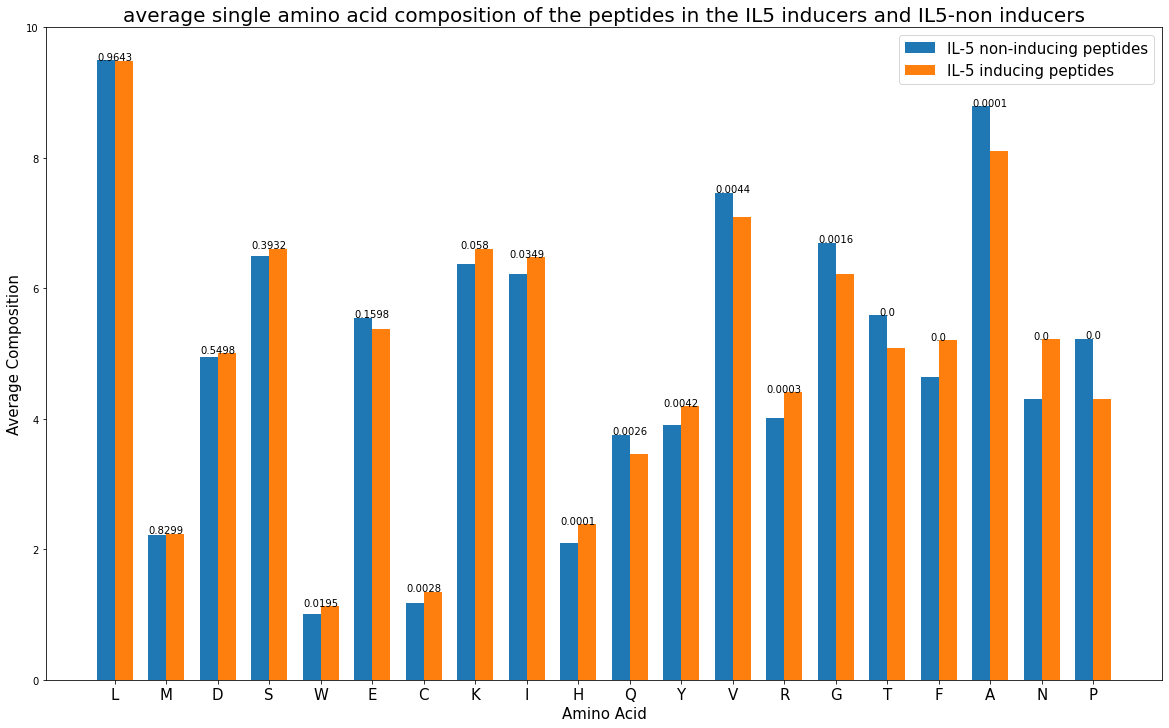

In [48]:
# Amino acid composition bar plot in increasing order of mean diff between the two groups
def addlabels(x,y,z):
    for i in range(len(x)):
        ax.text(i,z[i],y[i] , ha = 'center')  # the first position is for the x coordinate, the second for the y coordinate and then the third is for the value

labels = aa_comp.index
neg = aa_comp.neg
pos = aa_comp.pos


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/2, neg, width, label='IL-5 non-inducing peptides')
rects2 = ax.bar(x + width/2, pos, width, label='IL-5 inducing peptides')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Composition', fontsize=15)
ax.set_xlabel('Amino Acid', fontsize=15)
ax.set_title('average single amino acid composition of the peptides in the IL5 inducers and IL5-non inducers',
             fontsize=20)
ax.set_xticks(x, labels, fontsize=15)
ax.set_yticks(range(0,12,2))
ax.legend(fontsize=15)

addlabels(aa_comp.index, aa_comp['p-val'], aa_comp['greater'])

plt.show()

AAC analysis reveals **Ala(A), Gly(G), Pro(P), Thr(T)** as the most abundant amino acids in the **il-5 non-inducing peptides**
and **Phe(F), Asn(N), Arg(R)** as the most abundant amino acids in the **IL-5 inducing peptides**.
Leu(L) is abundant in both il-5 inducers and non-inducers.

## 3. PCA Plot to look at the distribution of data points belonging to the two classes

In [94]:
df

,Sequence,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,DRAHYNIVTFCCKCD,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,MHGDTPTLHEYM,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,DSTLRLCVQSTHVD,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,SCSPTFSSDPLTTPPLMLTT,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
16671,PLPWALQTTNLPLMAMSSLL,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895
16672,ILLLATMATAFMGYALPWGQ,Negative,20.00,0.00,0.00,0.00,5.00,10.00,0.00,5.00,...,0.0000,0.0000,0.0001,0.0000,0.0001,0.0001,0.2857,0.2857,0.2105,9402.0526
16673,SHMEPSFGLILHDGG,Positive,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3449,0.3449,0.3761,9801.2143


In [95]:
temp = df

X = temp.drop(columns=['Sequence','Qualitative_Measure'])
y = temp['Qualitative_Measure']

In [53]:
scaler = StandardScaler()

In [96]:
X_scaled = scaler.fit_transform(X)

In [97]:
pca = PCA(n_components=9189)

X_pca = pca.fit_transform(X_scaled)

In [98]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0093309 , 0.01508304, 0.0197531 , ..., 1.        , 1.        ,
       1.        ])

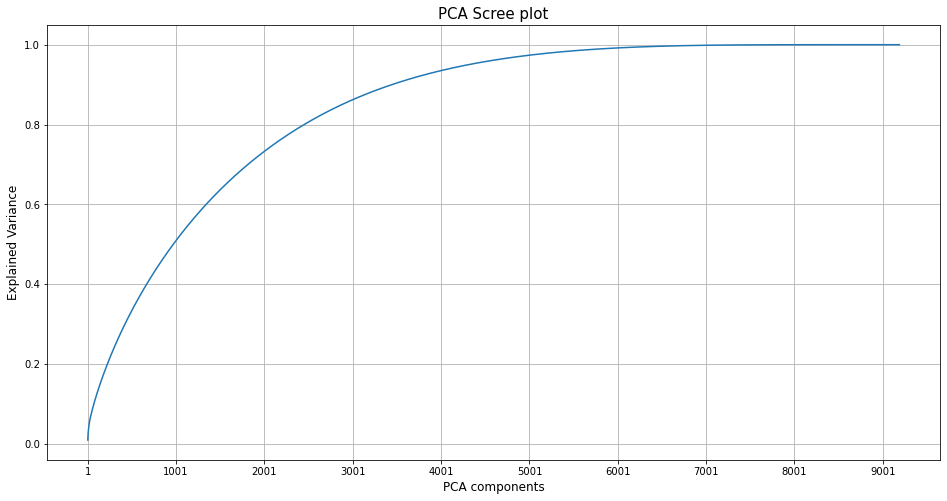

In [99]:
# scree plot
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,10000,1000), labels=range(1,10000,1000))
plt.xlabel('PCA components',fontsize=12)
plt.ylabel('Explained Variance',fontsize=12)
plt.title('PCA Scree plot', fontsize=15)
plt.grid()

From this cumsum explained variance ratio plot we can clearly see that around 6000 features out of the total 9189 features are able to explain 100% of the data and so according to PCA, this is how much we can reduce the dimensionality of the data without losing much variance or information.

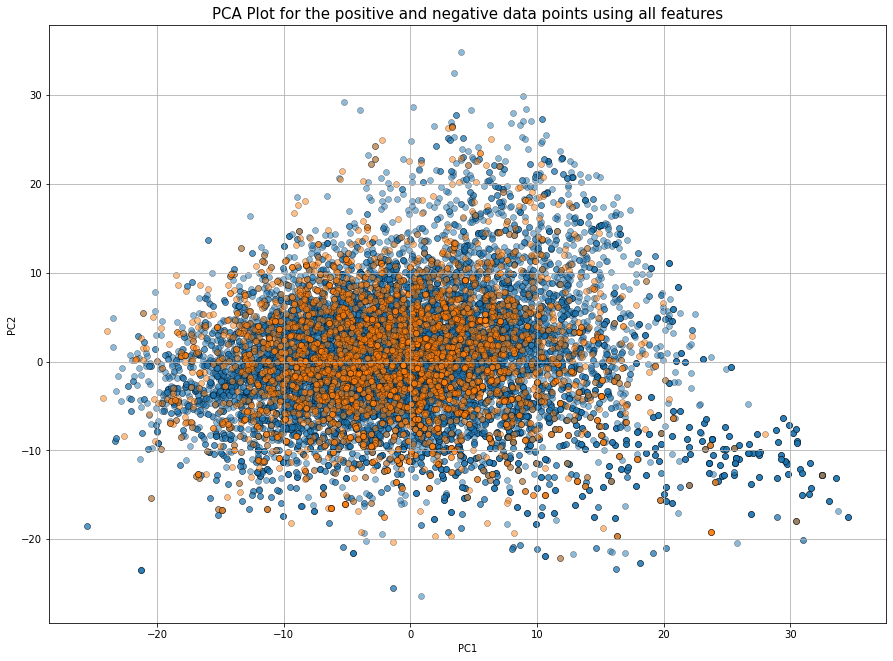

In [100]:
plt.figure(figsize=(15,11))
plt.scatter(X_pca[:,0][y[y == 'Negative'].index], X_pca[:,1][y[y == 'Negative'].index], label = 'Negative', alpha=0.5, linewidth=0.5, edgecolors='k')
plt.scatter(X_pca[:,0][y[y == 'Positive'].index], X_pca[:,1][y[y == 'Positive'].index], label = 'Positive', alpha=0.5, linewidth=0.5, edgecolors='k')
plt.title('PCA Plot for the positive and negative data points using all features', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

### do the same thing for data with only the important 1989 features selected using Recursive Feature Elimination

In [49]:
# the features to drop
with open('Data/features-to-drop.txt', 'r') as file:
    lines = [line for line in [line.replace('\n','') for line in file.readlines()]]

print(lines)

['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'DPC1_AA', 'DPC1_AC', 'DPC1_AE', 'DPC1_AF', 'DPC1_AG', 'DPC1_AK', 'DPC1_AL', 'DPC1_AM', 'DPC1_AQ', 'DPC1_AR', 'DPC1_AS', 'DPC1_AT', 'DPC1_AV', 'DPC1_AW', 'DPC1_AY', 'DPC1_CA', 'DPC1_CC', 'DPC1_CD', 'DPC1_CE', 'DPC1_CF', 'DPC1_CG', 'DPC1_CH', 'DPC1_CI', 'DPC1_CK', 'DPC1_CL', 'DPC1_CM', 'DPC1_CN', 'DPC1_CP', 'DPC1_CQ', 'DPC1_CR', 'DPC1_CS', 'DPC1_CT', 'DPC1_CV', 'DPC1_CW', 'DPC1_CY', 'DPC1_DA', 'DPC1_DD', 'DPC1_DE', 'DPC1_DF', 'DPC1_DG', 'DPC1_DH', 'DPC1_DI', 'DPC1_DK', 'DPC1_DL', 'DPC1_DM', 'DPC1_DN', 'DPC1_DP', 'DPC1_DR', 'DPC1_DS', 'DPC1_DT', 'DPC1_DW', 'DPC1_DY', 'DPC1_EA', 'DPC1_EC', 'DPC1_ED', 'DPC1_EE', 'DPC1_EF', 'DPC1_EG', 'DPC1_EH', 'DPC1_EI', 'DPC1_EK', 'DPC1_EL', 'DPC1_EM', 'DPC1_EP', 'DPC1_ER', 'DPC1_ES', 'DPC1_ET', 'DPC1_EV', 'DPC1_EW', 'DPC1_EY', 'DPC1_FA', 'DPC1_FC', 'DPC1_FD', 'DPC1_FE', 'DPC1

In [50]:
temp = df.drop(columns=lines)

X = temp.drop(columns=['Sequence','Qualitative_Measure'])
y = temp['Qualitative_Measure']

In [54]:
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1989)

X_pca = pca.fit_transform(X_scaled)

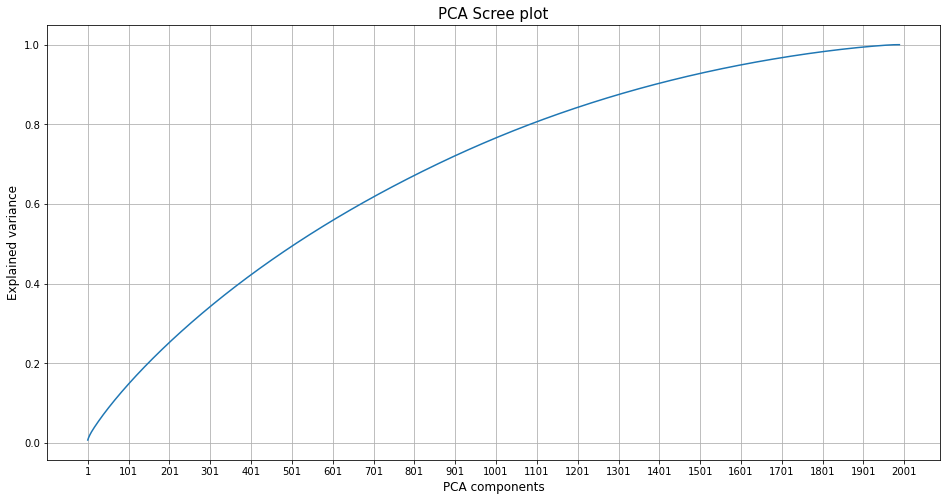

In [56]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,2100,100), labels=range(1,2101,100))
plt.xlabel('PCA components',fontsize=12)
plt.ylabel('Explained variance',fontsize=12)
plt.title('PCA Scree plot', fontsize=15)
plt.grid()

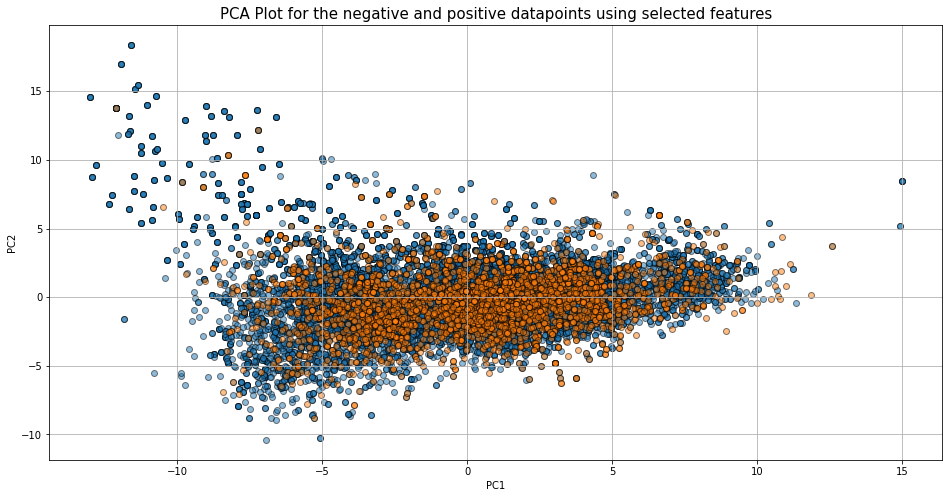

In [57]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca[y[y=='Negative'].index, 0], X_pca[y[y=='Negative'].index, 1], label='Negative', alpha=0.5, edgecolors='k')
plt.scatter(X_pca[y[y=='Positive'].index, 0], X_pca[y[y=='Positive'].index, 1], label='Positive', alpha=0.5, edgecolors='k')
plt.title('PCA Plot for the negative and positive datapoints using selected features', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

Even after having selected "important" features using Recursive Feature elimination, we still donot see much difference in the distribution of the data points of the two classes. This means that the features that have been selected weren't actually important. This is because for the IL-5 inducing or non-inducing peptides, none of the 9189 composition based features seem to be bear distinguishing information, and RFE selects featues on the basis of those which give good performance on the training set, thus overfits.

## 4. Positional Preference Analysis 
The Amino acid composition analysis just described the overall dominant residues in IL5 inducing and noninducing peptides. However, this information does not specify the positional preference of specific amino acid residues at specific positions. In order to know the preference of a particular amino acid at different positions or at N- or C-terminals, we create the two-sample logo for our positive and negative IL5 peptides.(http://dx.doi.org/10.1155/2013/263952)

**Method:**
for N-8 and C-8 mers for positive and negative dataset by slicing out 8 aa from N and C terminal ends of the peptides to make a uniform list of 16 aa long peptides


In [101]:
# we need to prepare sequences which can go into the R package ggseqlogo
negatives

14            AGLLGVVSTVLLGGV
16            HNWVNHAVPLAMKLI
21            MRKLAILSVSSFLFV
23            SSVFNVVNSSIGLIM
25            AGLLGVVSTVLLGGV
                 ...         
16664    ILLLATMATAFMGYVLPWGQ
16666    PLTTPPLMLTTWLLPLTIMA
16668    AFMGYALPWGQMSFWGATVI
16670    SCSPTFSSDPLTTPPLMLTT
16672    ILLLATMATAFMGYALPWGQ
Name: Sequence, Length: 13230, dtype: object

In [103]:
neg_two_sample = [i[:8] + i[-1:-9:-1] for i in negatives]

In [104]:
# saving as a txt file to be input into tsl
# with open('Data/neg_tsl.txt','w') as file:
#     for i in neg_two_sample:
#         line = i
#         file.writelines(i+'\n')

In [105]:
positives

0                DRAHYNIVTFCCKCD
1                   MHGDTPTLHEYM
2                 DSTLRLCVQSTHVD
3        RNGYRALMDKSLHVGTQCALTRR
4        RNGYRALMDKSLHVGTQCALTRR
                  ...           
16667       NLPLMAMSSLLLIIILALSL
16669       QKLAPISIMYQISPPLNVSL
16671       PLPWALQTTNLPLMAMSSLL
16673            SHMEPSFGLILHDGG
16674            AQRVASTVYQNCEHA
Name: Sequence, Length: 3445, dtype: object

In [107]:
pos_two_sample = [i[:8] + i[-1:-9:-1] for i in positives]

In [108]:
# with open('Data/pos_tsl.txt','w') as file:
#     for i in pos_two_sample:
#         line = i
#         file.writelines(i+'\n')

### A. Using R-package `ggseqlogo()`
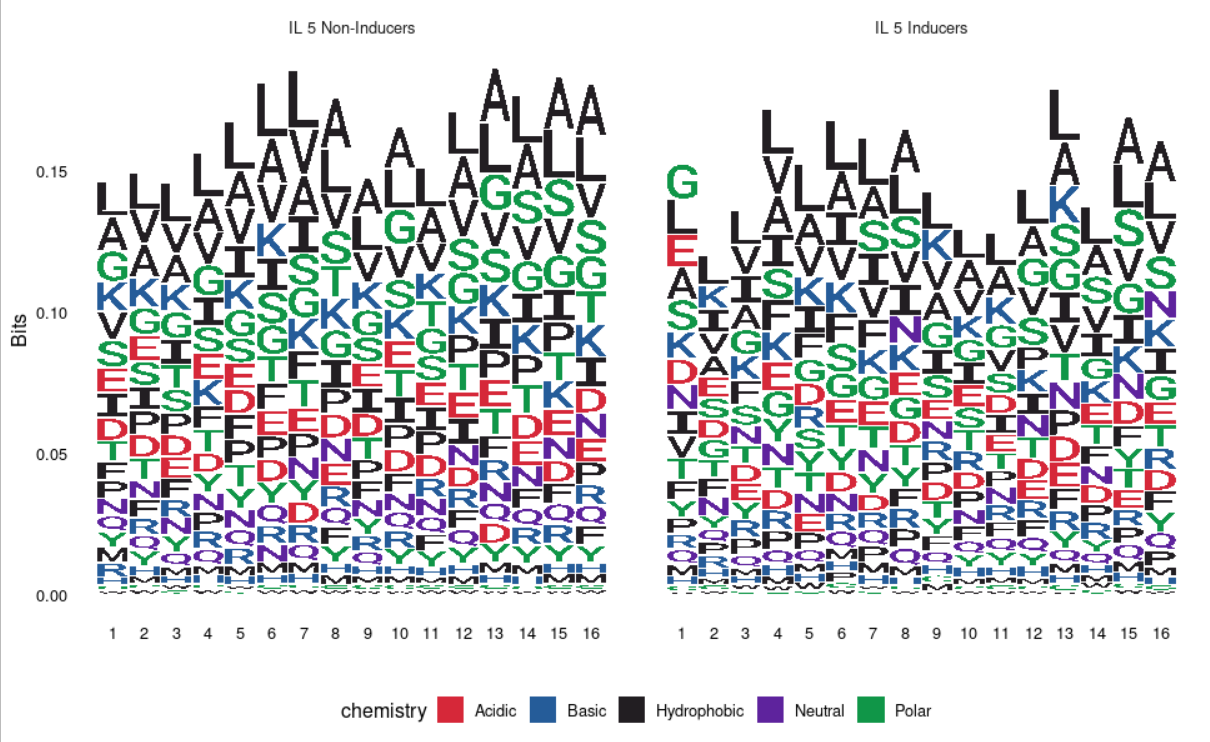

From the plot we can infer that for the il-5 non-inducing peptides at the:
* **N-terminal(pos1-pos8)** : Leucine(L) is predominant 
* **C-terminal(pos9-pos16)** : both Alanine(A) and Leucine(L) are predominant.

From the plot we can infer that for the il-5 inducing peptides at the:
* **N-terminal(pos1)** : Guanine(G) is predominant at pos 1 and at the rest of the positions leucine(L) and Alanine(A) 
* **C-terminal(pos9-pos16)** : both Alanine(A) and Leucine(L) are predominant.

### B. Using Two sample Logo
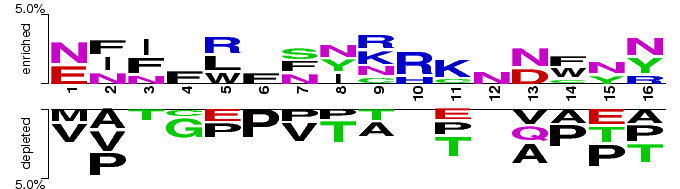

In this graph:
The enriched portion signifies the IL-5 inducers and the depleted portion signifies the IL-5 non-inducers.
* **IL-5 inducers**: position 5 of N-terminal and pos 9,10,11 of the C-terminal( technically the beginning of the C-terminal) are enriched in positively charged residues (R,K) (Particularly the C terminal is enriched in positively charged residues). In addition, IL5 inducers are also enriched in asparigine(N) at various positions of the N and C terminal (also evident from the length distribution analysis)
* **IL-5 non-inducers** : enriched in neutral residues ; Proline at pos 2,5,6 (N-terminal) and pos 14,15 (C-terminal) and then Threonine and Glycine at various positions.(Abundance of Proline in neg ds is also evident from amino acid composition analysis)

## 5. Motif Analysis using MERCI Software
1. Divide the peptide sequences according to positive and negatives
2. convert both into fasta format
3. first input positives into the -p parameter and negatives into the -n parameter, this will yield the motifs in the positive sequences
4. then do the reverse, that is input the negatives into the -p parameter and the positives into the -n parameter, this will yield the motifs in the negative sequences.
5. as for the motif length parameter, it should be set to 9 since the size of binding core in MHC-II is 9 amino acid.
6. now we should have two output files, each with unique motifs in the positive and negative sequences.

* Example: First navigate into the directory where the script is present ; and then input into the terminal

`perl MERCI.pl -p ../../Desktop/Projects/iedb/negatives.fasta -n ../../Desktop/Projects/iedb/positives.fasta -l 9 -o ../../Desktop/Projects/iedb/new_neg_motifs` 

This outputs the motifs determined for the negative ds.

In [58]:
# exclusive motifs in the negative sequences i.e., IL-5 non-inducers
neg_motifs = {'APGP': 72,
'PATP': 52,
'RSP': 52,
'GAPGP': 48,
'GLPGP': 44,
'LPGP': 44,
'TEEQ': 41,
'TTEE': 41,
'QKLIE': 40,
'ADKY': 39,
'EEQK': 39,
'PADK': 39}

In [59]:
neg_motifs_df = pd.DataFrame(index = neg_motifs.keys(), data = neg_motifs.values(), columns=['Number'])
neg_motifs_df.index.name = 'Neg Motifs'
neg_motifs_df.sort_values(by = 'Number', ascending=False)

,Number
Neg Motifs,
APGP,72
PATP,52
RSP,52
GAPGP,48
GLPGP,44
LPGP,44
TEEQ,41
TTEE,41
QKLIE,40


In [60]:
# exclusive motifs in the positive sequences i.e., IL-5 inducers.
pos_motifs = {'AATAANA':12,
'AATAANAA':12,
'DIKER':12,
'DIKERF':12,
'DIKERFA':12,
'IKER':12,
'IKERF':12,
'IKERFA':12,
'ISNP':12,
'KERF':12,
'KERFA':12,
'SDIKER':12,
'SDIKERF':12,
'SDIKERFA':12}

In [61]:
pos_motifs_df = pd.DataFrame(data = pos_motifs.values(), index = pos_motifs.keys(), columns = ['Number'])
pos_motifs_df.index.name = 'Pos Motifs'
pos_motifs_df.style.apply(lambda x: ['background : yellow' 
                                        if (x.name == 'AATAANAA' or x.name == 'ISNP' or x.name == 'SDIKERFA')
                                        else '' for i in x], axis=1)

,Number
Pos Motifs,
AATAANA,12
AATAANAA,12
DIKER,12
DIKERF,12
DIKERFA,12
IKER,12
IKERF,12
IKERFA,12
ISNP,12


The highlighted motifs seem to be the only ones which seem to be unique, the others seem to be inclusive within the highlighted ones.